In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns

In [2]:
df = pd.read_csv("./UNCC_sampled_1.csv")

In [3]:
df.iloc[:-1,:]

,Date,Mobile Device Type,cchannel (eVar19) (evar19),qformuid (evar1),TreeAuthID (evar50),Visit Number,Product Reporting,Visitor_ID,csource (eVar20) (evar20),GeoSegmentation States,...,FCS Qform Optin Completed (ev373) (event373),FCS Client Signup Completed (ev73) (event73),Lender Not Matched (ev522) (event522),FormSubmit in Express Offers (ev58) (event58),Lenders Matched (ev501) (event501),Page Views,Credit Card Apply Clicked (ev69) (event69),MyLT Session Started (ev189) (event189),Express No Offers (ev13) (event13),Express Visited (ev290) (event290)
0,"January 1, 2018",Gaming Console,content,NaN,NaN,1,NaN,7732198244151778867_4134450918576237336,outbrain,texas (united states),...,0,0,0,0,0,1,0,0,0,0
1,"January 1, 2018",Gaming Console,display,11633f92-360a-448f-b416-755ea16b6419,NaN,4,Refinance,2431284746265101166_8567539867164911934,google_display_network,virginia (united states),...,0,0,0,0,0,1,0,0,0,0
2,"January 1, 2018",Gaming Console,display,3786b340-e685-4798-8004-6ee5807934c3,NaN,2,Refinance,5951927093440429627_8402229250223050888,google_display_network,florida (united states),...,0,0,0,0,0,1,0,0,0,0
3,"January 1, 2018",Gaming Console,display,3eb4e8c0-dd45-4001-820f-0a83980472d8,NaN,1,Refinance,9095128932057308643_5744753714959771864,cnn_com,ohio (united states),...,0,0,0,0,0,0,0,0,0,0
4,"January 1, 2018",Gaming Console,display,50aad01f-07a3-45ec-a575-65d89900168f,NaN,1,Refinance,7144494725347131737_7936627049048254284,google_display_network,california (united states),...,0,0,0,0,0,1,0,0,0,0
5,"January 1, 2018",Gaming Console,display,6e1c1405-ffe0-486e-9bbd-46b62efa71e0,NaN,1,NaN,3840395548288420783_2563166581193760536,criteo,oregon (united states),...,0,0,0,0,0,1,0,0,0,0
6,"January 1, 2018",Gaming Console,display,b2b0ad9e-1a0d-4153-88c1-db3564acf2be,NaN,5,Refinance,5951927093440429627_8402229250223050888,google_display_network,florida (united states),...,0,0,0,0,0,1,0,0,0,0
7,"January 1, 2018",Media Player,content,72650659-e1b0-4a0c-9bc0-da2152f4f0a3,NaN,1,Refinance,9193455551599519817_2133625214278931623,taboola,maine (united states),...,0,0,0,0,0,13,0,0,0,0
8,"January 1, 2018",Media Player,display,29f06188-b6ad-415f-9565-42d9e66f7c9a,NaN,3,Refinance,4427865552475720477_747171176657803548,google_display_network,california (united states),...,0,0,0,0,0,1,0,0,0,0
9,"January 1, 2018",Media Player,display,5f1df36c-fbd2-4e53-aaa9-ad02563a19b1,NaN,1,Refinance,1114696381134181432_6527712537278417460,google_display_network,new hampshire (united states),...,0,0,0,0,0,1,0,0,0,0


In [4]:
df.shape

(3000000, 24)

In [5]:
countries_unique = df['GeoSegmentation States'].unique()
print(countries_unique)
print(len(countries_unique))

['texas (united states)' 'virginia (united states)'
 'florida (united states)' ..., 'savona (italy)' 'pisa (italy)'
 'azarbayjan-e-gharbi (iran (islamic republic of))']
1517


In [6]:
print(len(df["Mobile Device Type"].unique()))
print(df["Mobile Device Type"].unique())

7
['Gaming Console' 'Media Player' 'Mobile Phone' 'Other' 'Tablet'
 'Television' 'Set-top Box']


In [7]:
len(df['Visitor_ID'].unique()) # user may repeat

2764204

In [8]:
len(df['TreeAuthID (evar50)'].unique())

168200

In [9]:
print( "Column Names --> No. of Unique Values")
for column in df:
    print(column ,"-->",len(df[column].unique()))

Column Names --> No. of Unique Values
Date --> 90
Mobile Device Type --> 7
cchannel  (eVar19) (evar19) --> 43
qformuid (evar1) --> 2015119
TreeAuthID (evar50) --> 168200
Visit Number --> 557
Product Reporting --> 15
Visitor_ID --> 2764204
csource (eVar20) (evar20) --> 1394
GeoSegmentation States --> 1517
FormStart (ev57) (event57) --> 74
Form Engagement 1 (ev11) (event11) --> 9
Form Engagement 2 (ev12) (event12) --> 7
Form Conversion (ev59) (event59) --> 10
FCS Qform Optin Completed (ev373) (event373) --> 2
FCS Client Signup Completed (ev73) (event73) --> 2
Lender Not Matched (ev522) (event522) --> 6
FormSubmit in Express Offers (ev58) (event58) --> 36
Lenders Matched (ev501) (event501) --> 6
Page Views --> 177
Credit Card Apply Clicked (ev69) (event69) --> 24
MyLT Session Started (ev189) (event189) --> 8
Express No Offers (ev13) (event13) --> 1
Express Visited (ev290) (event290) --> 18


In [10]:
print ("Columns with missing variables",df.columns[df.isnull().any()])
print("Total missing variables\n",(df.isnull().sum()))
print("% of missing variables is ", round((4262 / df.shape[0])*100),"%")

Columns with missing variables Index(['cchannel  (eVar19) (evar19)', 'qformuid (evar1)',
       'TreeAuthID (evar50)', 'Product Reporting', 'csource (eVar20) (evar20)',
       'GeoSegmentation States'],
      dtype='object')
Total missing variables
 Date                                                   0
Mobile Device Type                                     0
cchannel  (eVar19) (evar19)                       286721
qformuid (evar1)                                  943628
TreeAuthID (evar50)                              2780571
Visit Number                                           0
Product Reporting                                 955464
Visitor_ID                                             0
csource (eVar20) (evar20)                         390816
GeoSegmentation States                            172747
FormStart (ev57) (event57)                             0
Form Engagement 1 (ev11) (event11)                     0
Form Engagement 2 (ev12) (event12)                     0
Form Conv

In [11]:
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
print("% of missing variables in columns ")
miss*100

% of missing variables in columns 


cchannel  (eVar19) (evar19)     9.557367
qformuid (evar1)               31.454267
TreeAuthID (evar50)            92.685700
Product Reporting              31.848800
csource (eVar20) (evar20)      13.027200
GeoSegmentation States          5.758233
dtype: float64

In [12]:
df = df.drop(["Lender Not Matched (ev522) (event522)","cchannel  (eVar19) (evar19)" ,"Lenders Matched (ev501) (event501)", "Express No Offers (ev13) (event13)"], axis = 1)

In [13]:
df_updated = df
df_updated

,Date,Mobile Device Type,qformuid (evar1),TreeAuthID (evar50),Visit Number,Product Reporting,Visitor_ID,csource (eVar20) (evar20),GeoSegmentation States,FormStart (ev57) (event57),Form Engagement 1 (ev11) (event11),Form Engagement 2 (ev12) (event12),Form Conversion (ev59) (event59),FCS Qform Optin Completed (ev373) (event373),FCS Client Signup Completed (ev73) (event73),FormSubmit in Express Offers (ev58) (event58),Page Views,Credit Card Apply Clicked (ev69) (event69),MyLT Session Started (ev189) (event189),Express Visited (ev290) (event290)
0,"January 1, 2018",Gaming Console,NaN,NaN,1,NaN,7732198244151778867_4134450918576237336,outbrain,texas (united states),0,0,0,0,0,0,0,1,0,0,0
1,"January 1, 2018",Gaming Console,11633f92-360a-448f-b416-755ea16b6419,NaN,4,Refinance,2431284746265101166_8567539867164911934,google_display_network,virginia (united states),1,0,0,0,0,0,0,1,0,0,0
2,"January 1, 2018",Gaming Console,3786b340-e685-4798-8004-6ee5807934c3,NaN,2,Refinance,5951927093440429627_8402229250223050888,google_display_network,florida (united states),1,0,0,0,0,0,0,1,0,0,0
3,"January 1, 2018",Gaming Console,3eb4e8c0-dd45-4001-820f-0a83980472d8,NaN,1,Refinance,9095128932057308643_5744753714959771864,cnn_com,ohio (united states),1,0,0,0,0,0,0,0,0,0,0
4,"January 1, 2018",Gaming Console,50aad01f-07a3-45ec-a575-65d89900168f,NaN,1,Refinance,7144494725347131737_7936627049048254284,google_display_network,california (united states),1,0,0,0,0,0,0,1,0,0,0
5,"January 1, 2018",Gaming Console,6e1c1405-ffe0-486e-9bbd-46b62efa71e0,NaN,1,NaN,3840395548288420783_2563166581193760536,criteo,oregon (united states),0,0,0,0,0,0,0,1,0,0,0
6,"January 1, 2018",Gaming Console,b2b0ad9e-1a0d-4153-88c1-db3564acf2be,NaN,5,Refinance,5951927093440429627_8402229250223050888,google_display_network,florida (united states),1,0,0,0,0,0,0,1,0,0,0
7,"January 1, 2018",Media Player,72650659-e1b0-4a0c-9bc0-da2152f4f0a3,NaN,1,Refinance,9193455551599519817_2133625214278931623,taboola,maine (united states),1,1,1,0,0,0,0,13,0,0,0
8,"January 1, 2018",Media Player,29f06188-b6ad-415f-9565-42d9e66f7c9a,NaN,3,Refinance,4427865552475720477_747171176657803548,google_display_network,california (united states),1,0,0,0,0,0,0,1,0,0,0
9,"January 1, 2018",Media Player,5f1df36c-fbd2-4e53-aaa9-ad02563a19b1,NaN,1,Refinance,1114696381134181432_6527712537278417460,google_display_network,new hampshire (united states),1,0,0,0,0,0,0,1,0,0,0


In [14]:
df["TreeAuthID (evar50)"] = df["TreeAuthID (evar50)"].fillna(0)
#df["TreeAuthID (evar50)"].head(130)

In [15]:
#Column TreeAuth ID
TreeAuthID = []
for ID in df["TreeAuthID (evar50)"]:
    ID = 1 if ID !=0 else 0
    TreeAuthID.append(ID)
df_updated["TreeAuthID (evar50)"] = TreeAuthID

In [16]:
"""for i in range(len(df["TreeAuthID (evar50)"])):   
    df["TreeAuthID (evar50)"][i] = TreeAuthID[i]"""

'for i in range(len(df["TreeAuthID (evar50)"])):   \n    df["TreeAuthID (evar50)"][i] = TreeAuthID[i]'

In [17]:
#df["TreeAuthID (evar50)"]

In [18]:
df["csource (eVar20) (evar20)"] = df["csource (eVar20) (evar20)"].replace(np.nan,"unknown")
df["Product Reporting"] = df["Product Reporting"].replace(np.nan, "unknown")
df["Mobile Device Type"] = df["Mobile Device Type"].replace(np.nan, "others")


In [19]:
FormStart = []
for ID in df["FormStart (ev57) (event57)"]:
    ID = 1 if ID !=0 else 0
    FormStart.append(ID)
print(set(FormStart))
df_updated["FormStart (ev57) (event57)"] = FormStart

{0, 1}


In [20]:
FormEngagement1 = []
for ID in df["Form Engagement 1 (ev11) (event11)"]:
    ID = 1 if ID !=0 else 0
    FormEngagement1.append(ID)
print(set(FormEngagement1))
df_updated["Form Engagement 1 (ev11) (event11)"] = FormEngagement1

{0, 1}


In [21]:
FormEngagement2 = []
for ID in df["Form Engagement 2 (ev12) (event12)"]:
    ID = 1 if ID !=0 else 0
    FormEngagement2.append(ID)
print(set(FormEngagement2))
df_updated["Form Engagement 2 (ev12) (event12)"] = FormEngagement2

{0, 1}


In [22]:
FormConversion = []
for ID in df["Form Conversion (ev59) (event59)"]:
    ID = 1 if ID !=0 else 0
    FormConversion.append(ID)
print(set(FormConversion))
df_updated["Form Conversion (ev59) (event59)"] = FormConversion

{0, 1}


In [23]:
qformuid= []
df["qformuid (evar1)"] = df["qformuid (evar1)"].replace(np.nan , 0)
for ID in df["qformuid (evar1)"]:
    ID = 1 if ID !=0 else 0
    qformuid.append(ID)
print(set(qformuid))
df_updated["qformuid (evar1)"] = qformuid

{0, 1}


In [24]:
df_country = df['GeoSegmentation States']
df_country = df_country.fillna("US (unitedstates)")
#print(set(df_country))
#(df_country == "Null (Nan)").sum()

In [25]:
#Country List
country_list = []
for country in df_country:
    country_list.append((country[country.find("(")+1:country.find(")")]))
#print(set(country_list))
df_updated["GeoSegmentation States"] = country_list

In [26]:
qformOptinCompleted= []
#df["FCS Qform Optin Completed (ev373) (event373)"] = df["qformuid (evar1)"].replace(np.nan , 0)
for ID in df["FCS Qform Optin Completed (ev373) (event373)"]:
    ID = 1 if ID !=0 else 0
    qformOptinCompleted.append(ID)
print(set(qformOptinCompleted))
df_updated["FCS Qform Optin Completed (ev373) (event373)"] = qformOptinCompleted

{0, 1}


In [27]:
FCSClientSignupCompleted= []
#df["qformuid (evar1)"] = df["qformuid (evar1)"].replace(np.nan , 0)
for ID in df["FCS Client Signup Completed (ev73) (event73)"]:
    ID = 1 if ID !=0 else 0
    FCSClientSignupCompleted.append(ID)
print(set(FCSClientSignupCompleted))
df_updated["FCS Client Signup Completed (ev73) (event73)"] = FCSClientSignupCompleted

{0, 1}


In [28]:
#FormSubmit in Express Offers (ev58) (event58)
FormSubmitExpressOffers= []
#df["qformuid (evar1)"] = df["qformuid (evar1)"].replace(np.nan , 0)
for ID in df["FormSubmit in Express Offers (ev58) (event58)"]:
    ID = 1 if ID !=0 else 0
    FormSubmitExpressOffers.append(ID)
print(set(FormSubmitExpressOffers))
df_updated["FormSubmit in Express Offers (ev58) (event58)"] = FormSubmitExpressOffers

{0, 1}


In [29]:
#Credit Card Apply Clicked (ev69) (event69)
CreditCardApplyClicked= []
#df["qformuid (evar1)"] = df["qformuid (evar1)"].replace(np.nan , 0)
for ID in df["Credit Card Apply Clicked (ev69) (event69)"]:
    ID = 1 if ID !=0 else 0
    CreditCardApplyClicked.append(ID)
print(set(CreditCardApplyClicked))
df_updated["Credit Card Apply Clicked (ev69) (event69)"] = CreditCardApplyClicked

{0, 1}


In [32]:
#MyLT Session Started (ev189) (event189)
MyLTSessionstarted= []
#df["qformuid (evar1)"] = df["qformuid (evar1)"].replace(np.nan , 0)
for ID in df["MyLT Session Started (ev189) (event189)"]:
    ID = 1 if ID !=0 else 0
    MyLTSessionstarted.append(ID)
print(set(MyLTSessionstarted))
df_updated["MyLT Session Started (ev189) (event189)"] = MyLTSessionstarted

{0, 1}


In [33]:
#Express Visited (ev290) (event290)
ExpressVisited= []
#df["qformuid (evar1)"] = df["qformuid (evar1)"].replace(np.nan , 0)
for ID in df["Express Visited (ev290) (event290)"]:
    ID = 1 if ID !=0 else 0
    ExpressVisited.append(ID)
print(set(ExpressVisited))
df_updated["Express Visited (ev290) (event290)"] = ExpressVisited

{0, 1}


In [37]:
print( "Column Names --> No. of Unique Values")
for column in df:
    print(column ,"-->",len(df_updated[column].unique()))

Column Names --> No. of Unique Values
Date --> 90
Mobile Device Type --> 7
qformuid (evar1) --> 2
TreeAuthID (evar50) --> 2
Visit Number --> 557
Product Reporting --> 15
Visitor_ID --> 2764204
csource (eVar20) (evar20) --> 1394
GeoSegmentation States --> 205
FormStart (ev57) (event57) --> 2
Form Engagement 1 (ev11) (event11) --> 2
Form Engagement 2 (ev12) (event12) --> 2
Form Conversion (ev59) (event59) --> 2
FCS Qform Optin Completed (ev373) (event373) --> 2
FCS Client Signup Completed (ev73) (event73) --> 2
FormSubmit in Express Offers (ev58) (event58) --> 2
Page Views --> 177
Credit Card Apply Clicked (ev69) (event69) --> 2
MyLT Session Started (ev189) (event189) --> 2
Express Visited (ev290) (event290) --> 2


In [54]:
df_visualizations = df_updated
df_visualizations = df_visualizations.drop(["Date","Visitor_ID", "Visit Number","GeoSegmentation States", "csource (eVar20) (evar20)", "Page Views"], axis = 1)

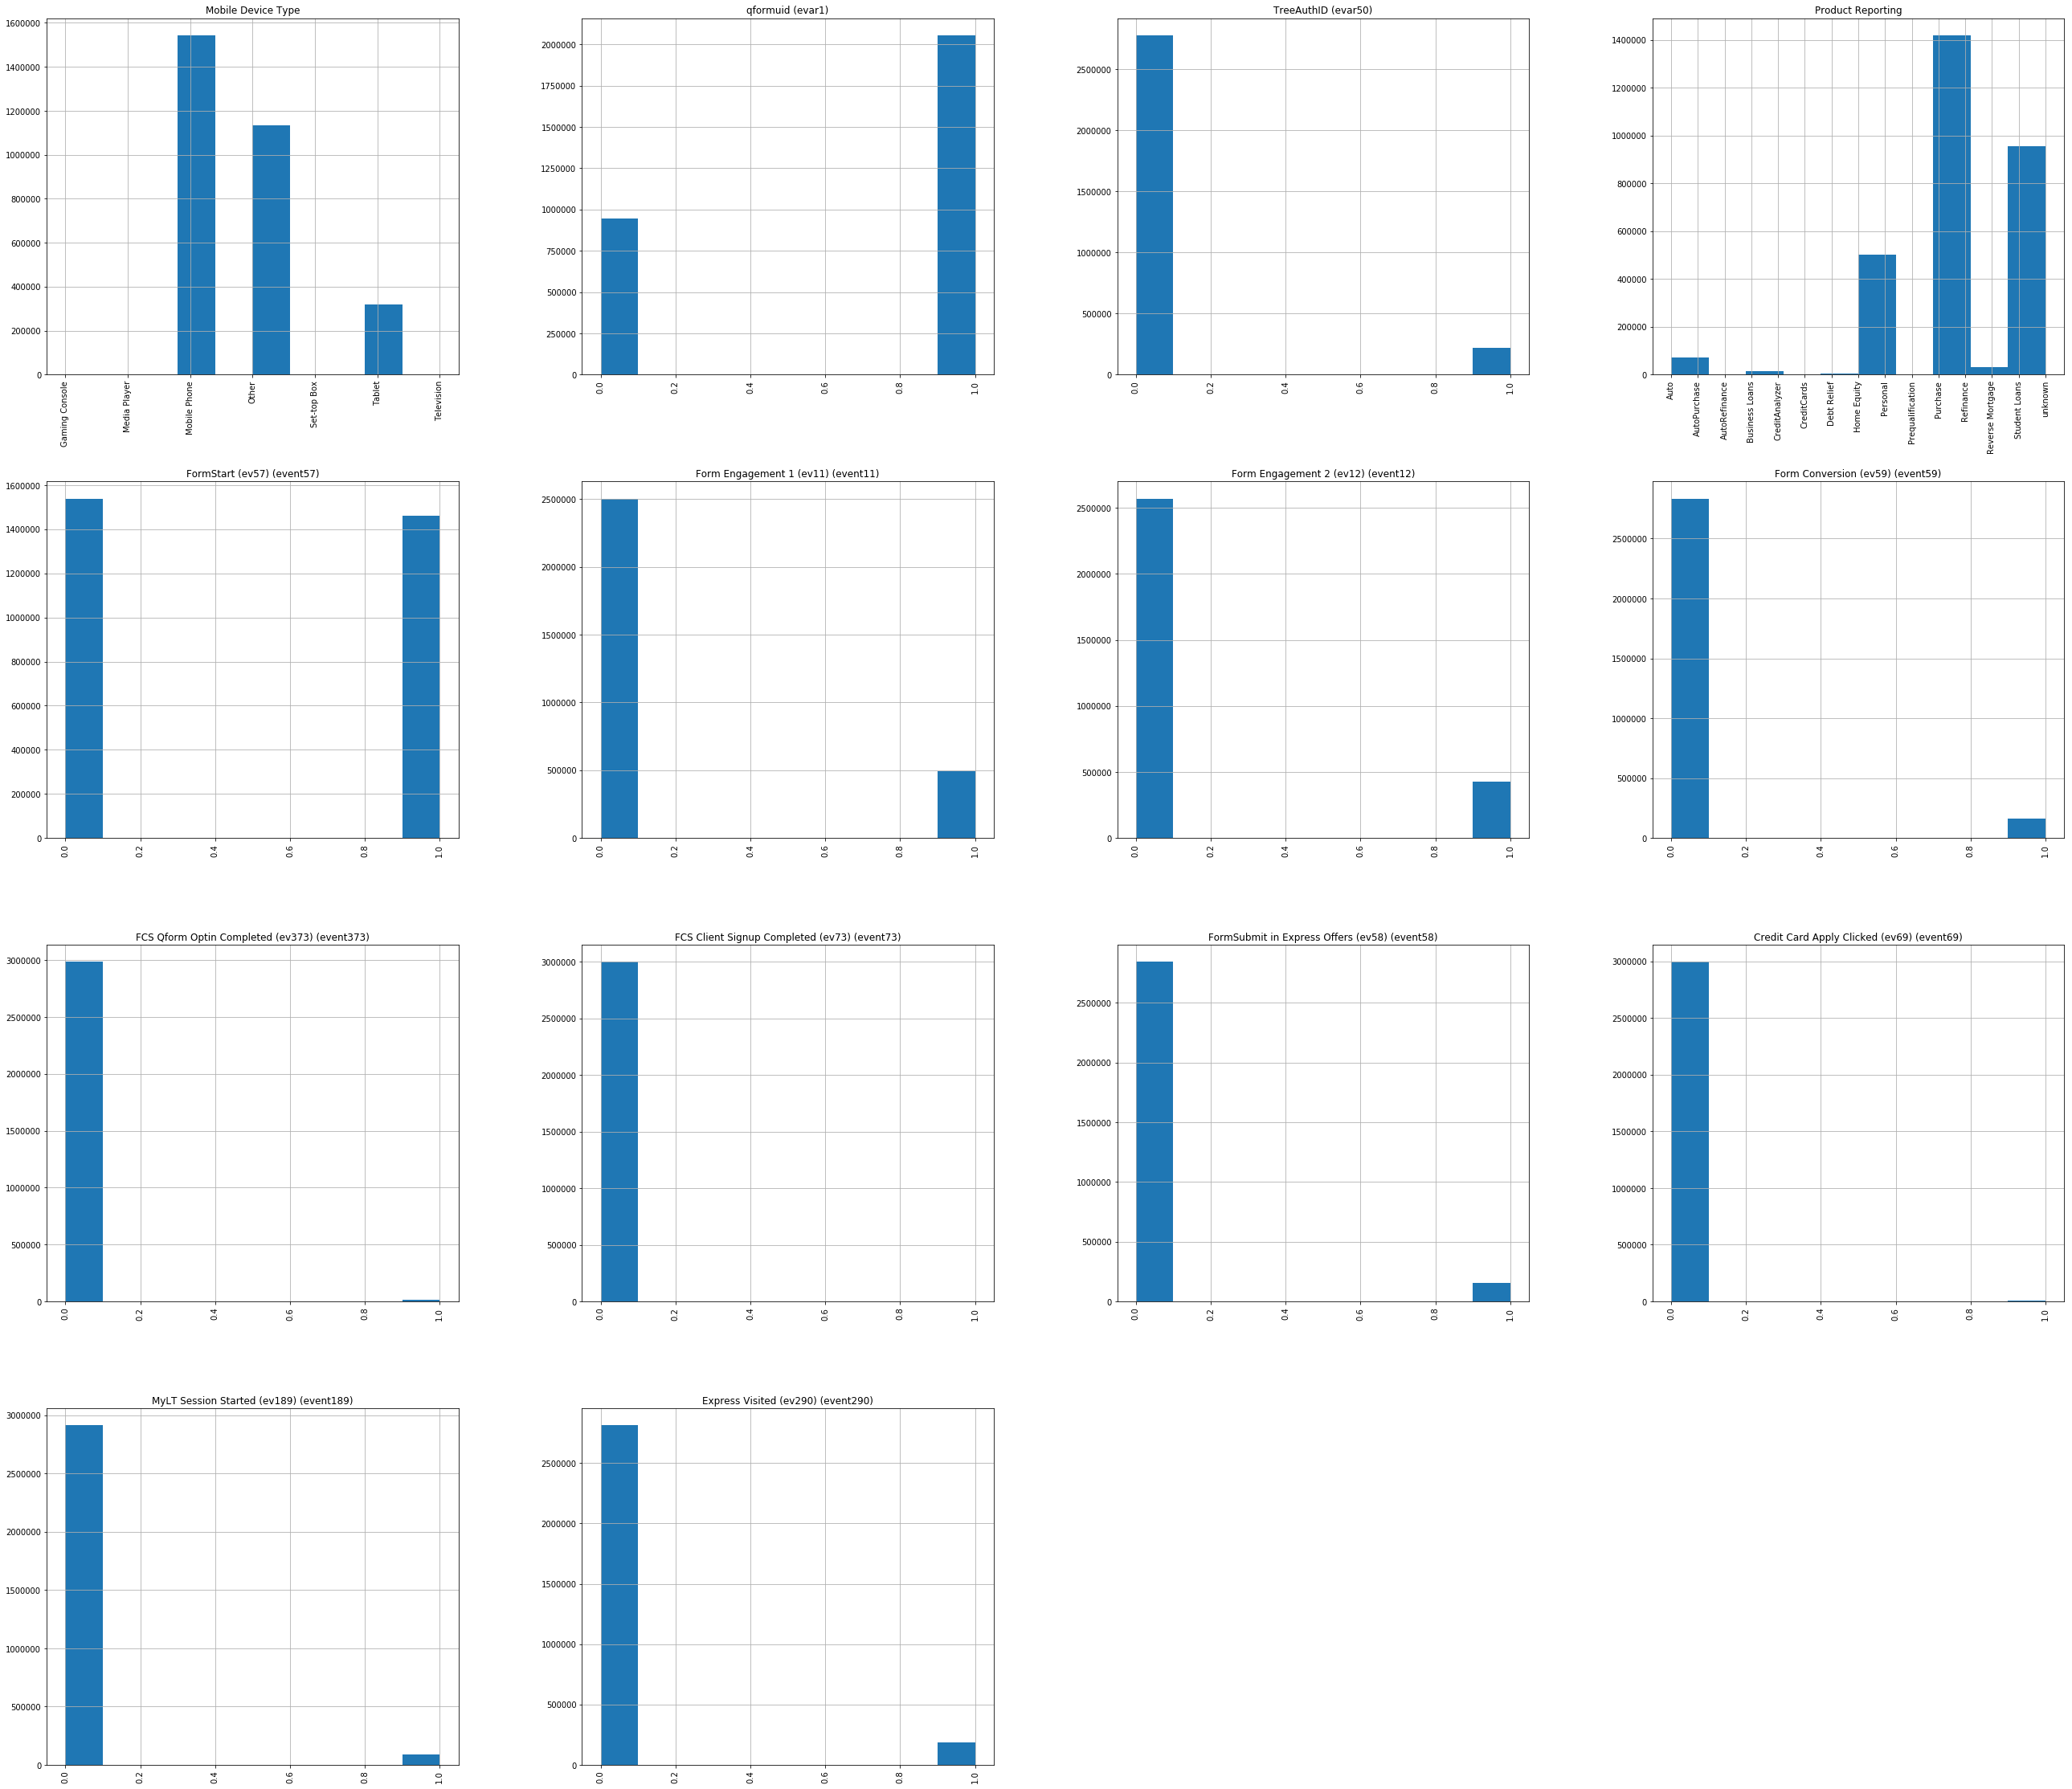

In [65]:
#Data Analysis of encoded data
fig = plt.figure(figsize=(45,40))
cols = 4
rows = ceil(float(df_visualizations.shape[1]) / cols)
for i, column in enumerate(df_visualizations.columns):    
    ax = fig.add_subplot(rows, cols, i + 1)    
    ax.set_title(column)    
    df_visualizations[column].hist(axes=ax)    
    plt.xticks(rotation="vertical")   
plt.subplots_adjust(hspace=0.3, wspace=0.3)  
plt.show()

In [ ]:
df_preprocessed = pd.read_excel("./Preprcessed_data_UNCC_Sampled.xlsx")